# Titanic Project :- DataTrained | Practice Project

## Problem Statement:

### Predict if an arbitrary passenger on Titanic would survive the sinking or not.

### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

### Import data from github and start the preprocessing steps:

In [2]:
# taking data from the given link on Github

data= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# checking shape

data.shape

(891, 12)

### Observation:

#### This dataset contains 891 rows & 12 columns.

In [4]:
data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

### Observations:

### Exploratory data analysis(EDA) :

#### Let's calculate how many are Survived

In [5]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:ylabel='Survived'>

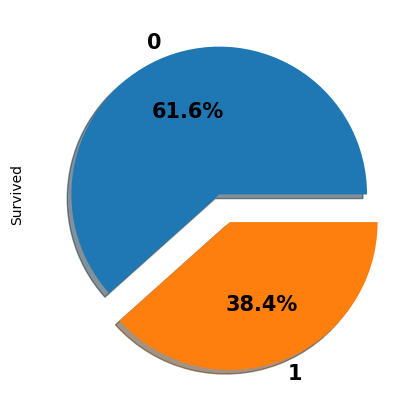

In [6]:
data['Survived'].value_counts().plot.pie(explode=[0,0.2],textprops ={ 'fontsize':15,'fontweight' :'bold'},
                                       autopct='%2.1f%%',shadow=True)

<AxesSubplot:xlabel='Survived', ylabel='count'>

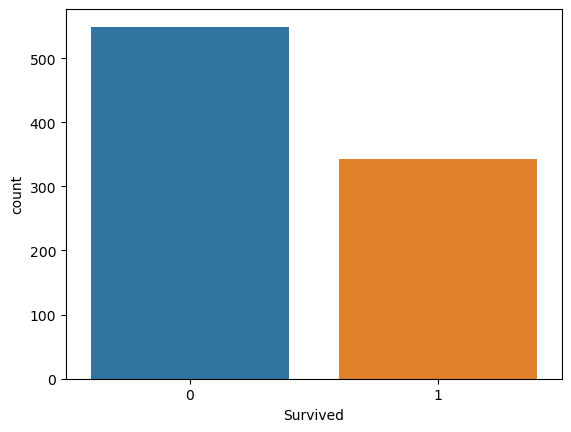

In [7]:
sns.countplot('Survived',data=data)

### Observations:

Not many passengers survived the accident as most of the data are in 0 class.

Out of 891 passengers , only 342 were survived i.e only 38.4% .

### Exploration of Gender Vs Survival :

In [8]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

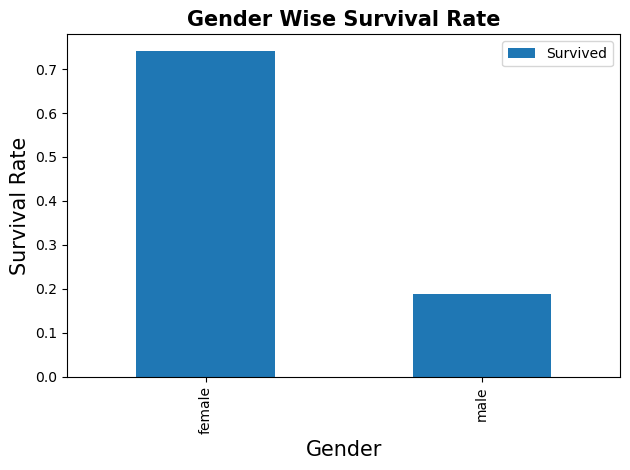

In [9]:
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar()

plt.title('Gender Wise Survival Rate',fontsize=15,fontweight ='bold')

plt.xlabel("Gender",fontsize=15)
plt.ylabel("Survival Rate", fontsize= 15)
plt.tight_layout()
plt.show()

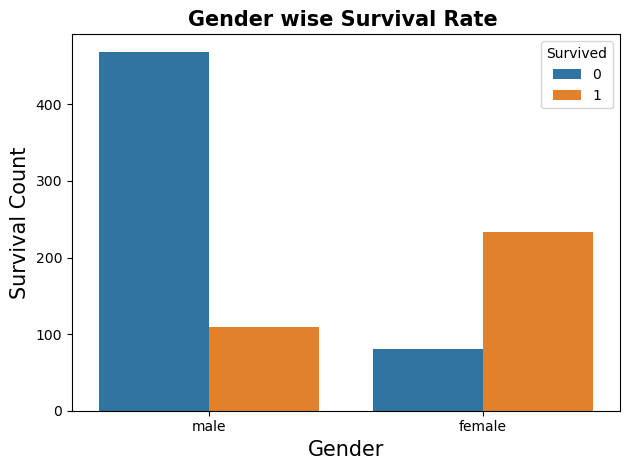

In [10]:
sns.countplot('Sex', hue='Survived', data=data)
plt.title('Gender wise Survival Rate ',fontsize=15, fontweight='bold')

plt.xlabel("Gender",fontsize=15)
plt.ylabel("Survival Count", fontsize=15)
plt.tight_layout()
plt.show()

### Observations:

The number of men is greater than the number of women. But the number of men survived is much less than the number of female. The survival rates forwoman is above 70% and that for men is around 20%.

### Exploration of Pclass Vs Survival

In [11]:
data.groupby(['Pclass','Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

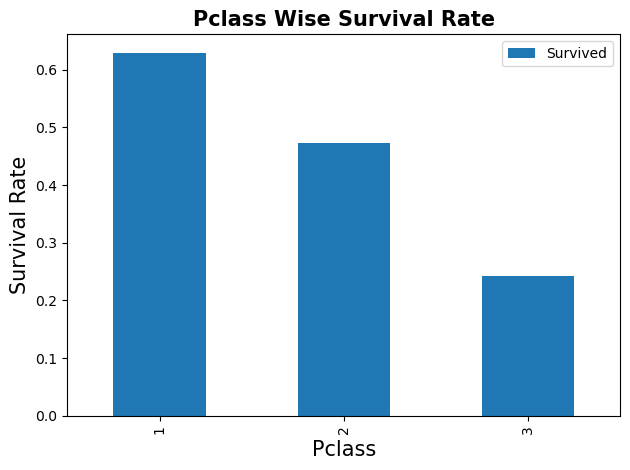

In [12]:
data[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar()

plt.title('Pclass Wise Survival Rate',fontsize=15,fontweight ='bold')

plt.xlabel("Pclass",fontsize=15)
plt.ylabel("Survival Rate", fontsize= 15)
plt.tight_layout()
plt.show()

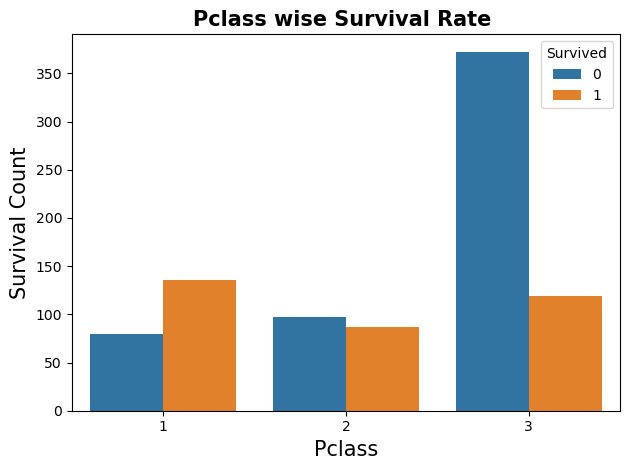

In [13]:
sns.countplot('Pclass', hue='Survived', data=data)
plt.title('Pclass wise Survival Rate ',fontsize=15, fontweight='bold')

plt.xlabel("Pclass",fontsize=15)
plt.ylabel("Survival Count", fontsize=15)
plt.tight_layout()
plt.show()

### Observations:

The passengers in the first class(Pclass= 1) survived more and the percentage is around 60%

The least no of survived passengers are in third class(Pclass= 3) and the percentage is around 25%.

### Exploration Survival rate Vs Sex and Pclass Together:

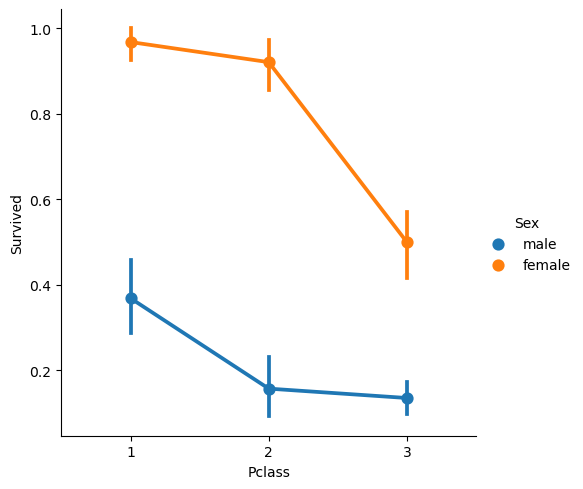

In [14]:
sns.factorplot('Pclass','Survived',hue='Sex',data=data)
plt.show()

### Observations:

Survival for Women from Pclass 1 is about 95%.

More women are survived with respect to men for any of the three different Pclass

### Exploration Survival rate Vs Age:

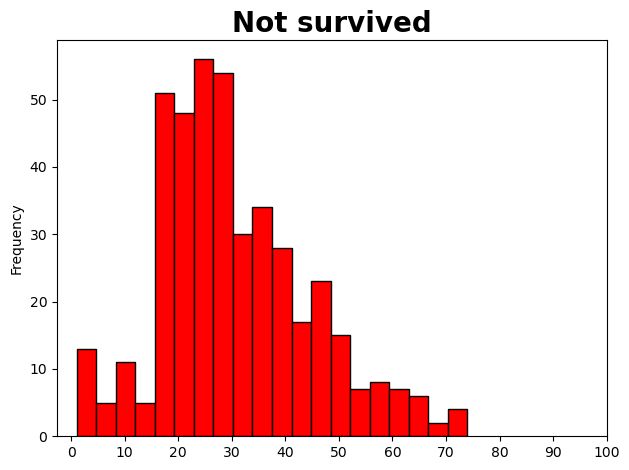

In [15]:
data[data['Survived']==0].Age.plot.hist(bins=20,edgecolor='black',color='red')
plt.title('Not survived',fontsize= 20, fontweight='bold')
plt.xticks(range(0,110,10))
plt.tight_layout()
plt.show()

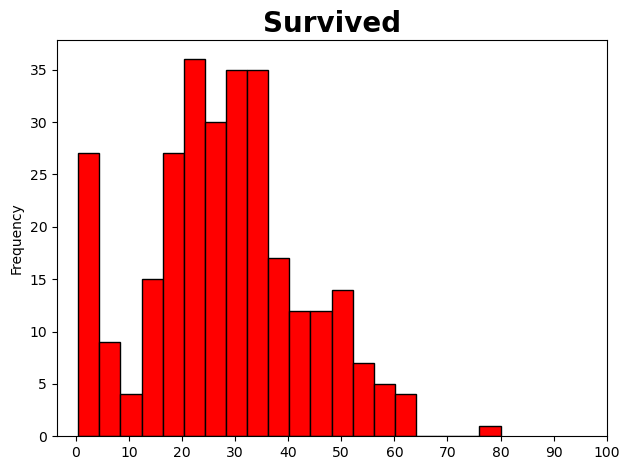

In [16]:
data[data['Survived']==1].Age.plot.hist(bins=20,edgecolor='black',color='red')
plt.title('Survived',fontsize= 20, fontweight='bold')
plt.xticks(range(0,110,10))
plt.tight_layout()
plt.show()

### Observations:

Older and younger age passengers were survived more.

Most of the passengers of middle age (15-30) were not survived.

### Exploration Survival rate VS Embarked :

<AxesSubplot:xlabel='Survived', ylabel='count'>

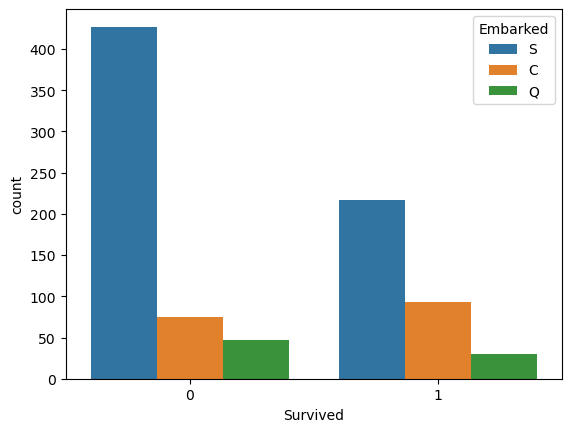

In [17]:
sns.countplot(data = data,x='Survived',hue = 'Embarked' )

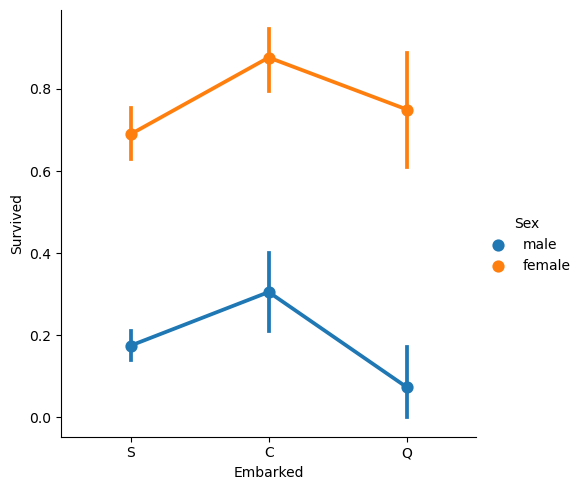

In [18]:
sns.factorplot('Embarked','Survived',hue='Sex',data=data)
plt.show()

### Observations:

For both survived and not survived case, the max "Embarked" is "S".

The Passengers from C were much survived.

### Exploration Survival rate VS Fare and Pclass:

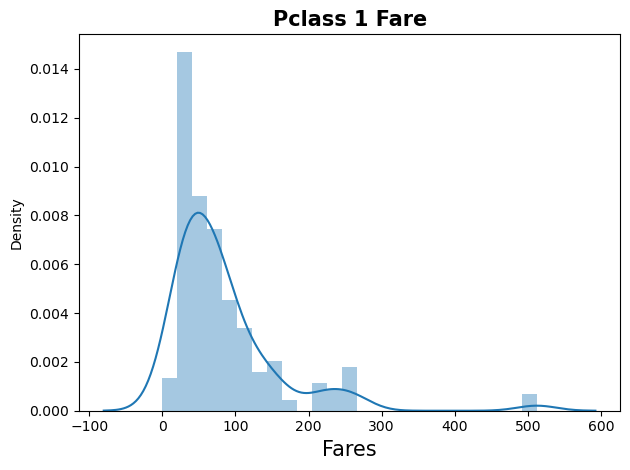

In [19]:
sns.distplot(data[data['Pclass']==1].Fare)
plt. title('Pclass 1 Fare',fontsize= 15, fontweight='bold')

plt. xlabel('Fares', fontsize= 15)
plt.tight_layout()
plt.show()

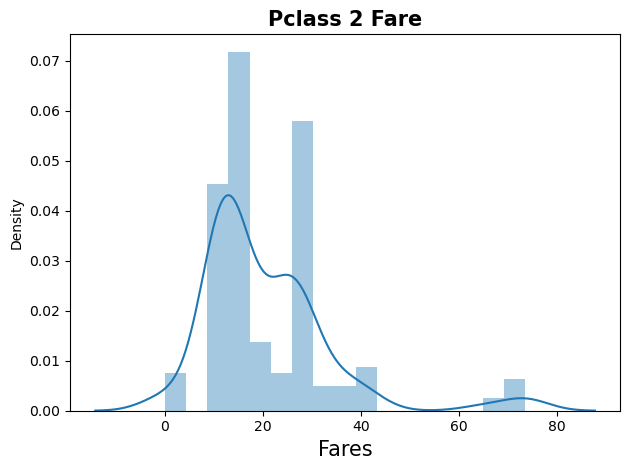

In [20]:
sns.distplot(data[data['Pclass']==2].Fare)
plt. title('Pclass 2 Fare',fontsize= 15, fontweight='bold')

plt. xlabel('Fares', fontsize= 15)
plt.tight_layout()
plt.show()


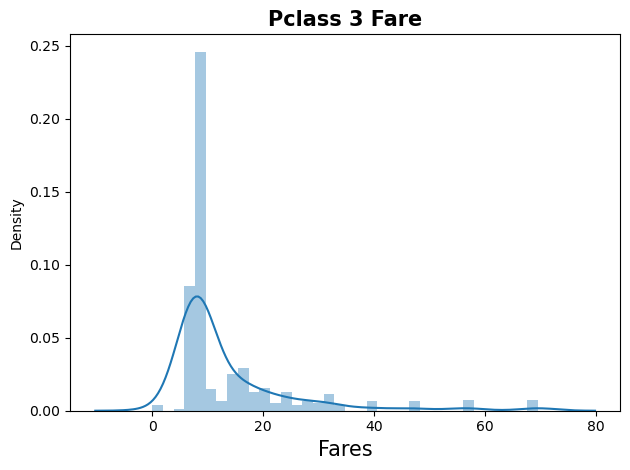

In [21]:
sns.distplot(data[data['Pclass']==3].Fare)
plt. title('Pclass 3 Fare',fontsize= 15, fontweight='bold')

plt. xlabel('Fares', fontsize= 15)
plt.tight_layout()
plt.show()

### Observations:

The fare in Pclass 1 is much with respect to other two pclass.

### Exploration Survival rate VS SibSp:

<AxesSubplot:xlabel='Survived', ylabel='count'>

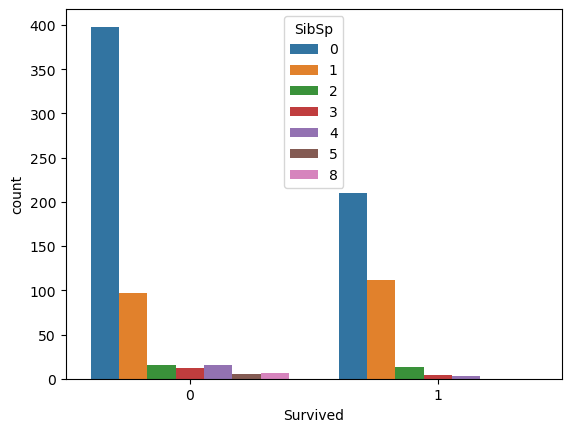

In [22]:
sns.countplot(data = data,x='Survived',hue ='SibSp')

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


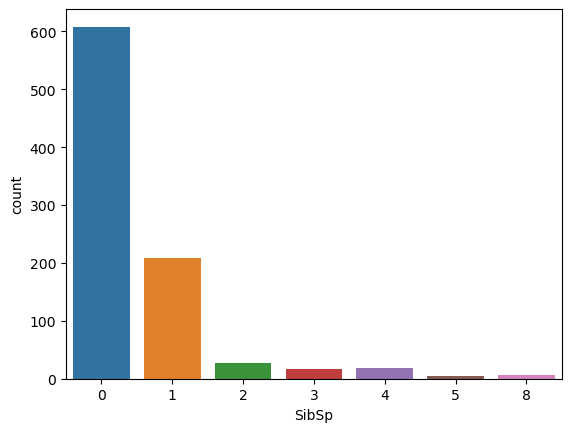

In [23]:
print(data['SibSp'].value_counts())
sns.countplot(data=data, x='SibSp')
plt.show()

<Figure size 2000x1000 with 0 Axes>

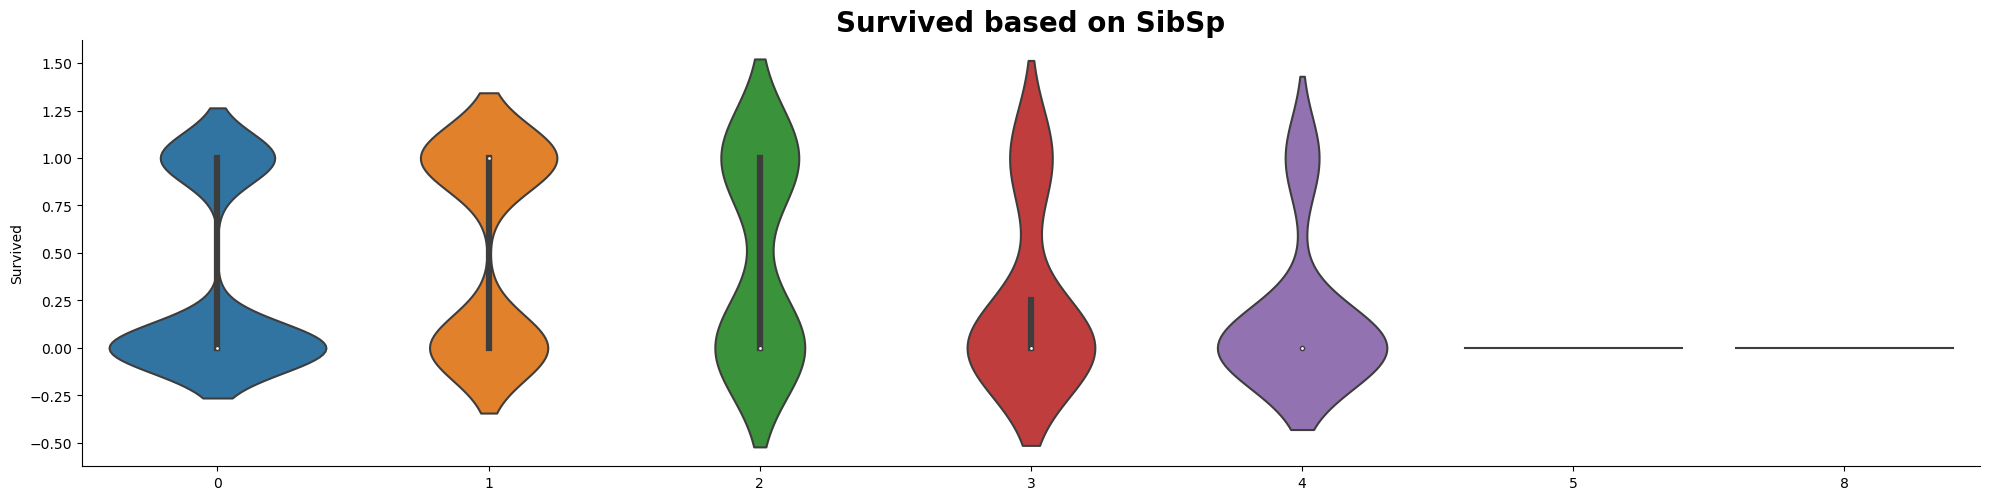

In [24]:
plt.figure(figsize =(20,10))
sns.catplot(x = 'SibSp',y ='Survived',kind = 'violin',data = data, aspect=4)
plt.xlabel("",fontsize=20)
plt.title("Survived based on SibSp", fontsize= 20,fontweight= "bold" )
plt.show()

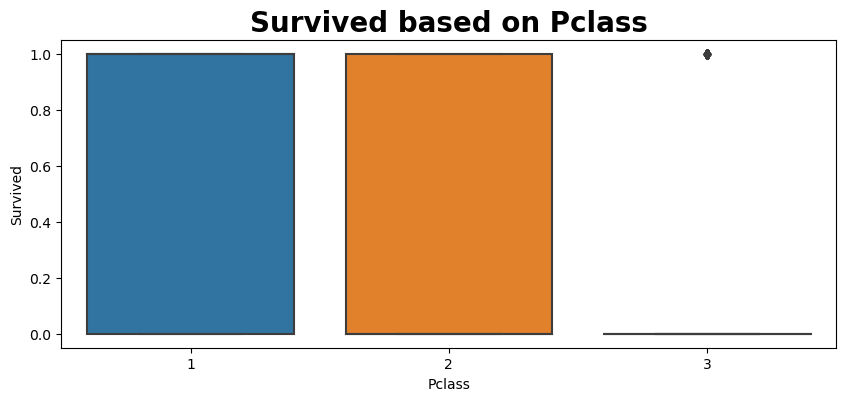

In [25]:
plt.figure(figsize = (10,4))
sns.boxplot(x = "Pclass",y = "Survived", data = data)
plt.title("Survived based on Pclass", fontsize= 20,fontweight= "bold" )
plt.show()

### Observations:

The data with maximum number of occurrence of 'SibSp' is 0.

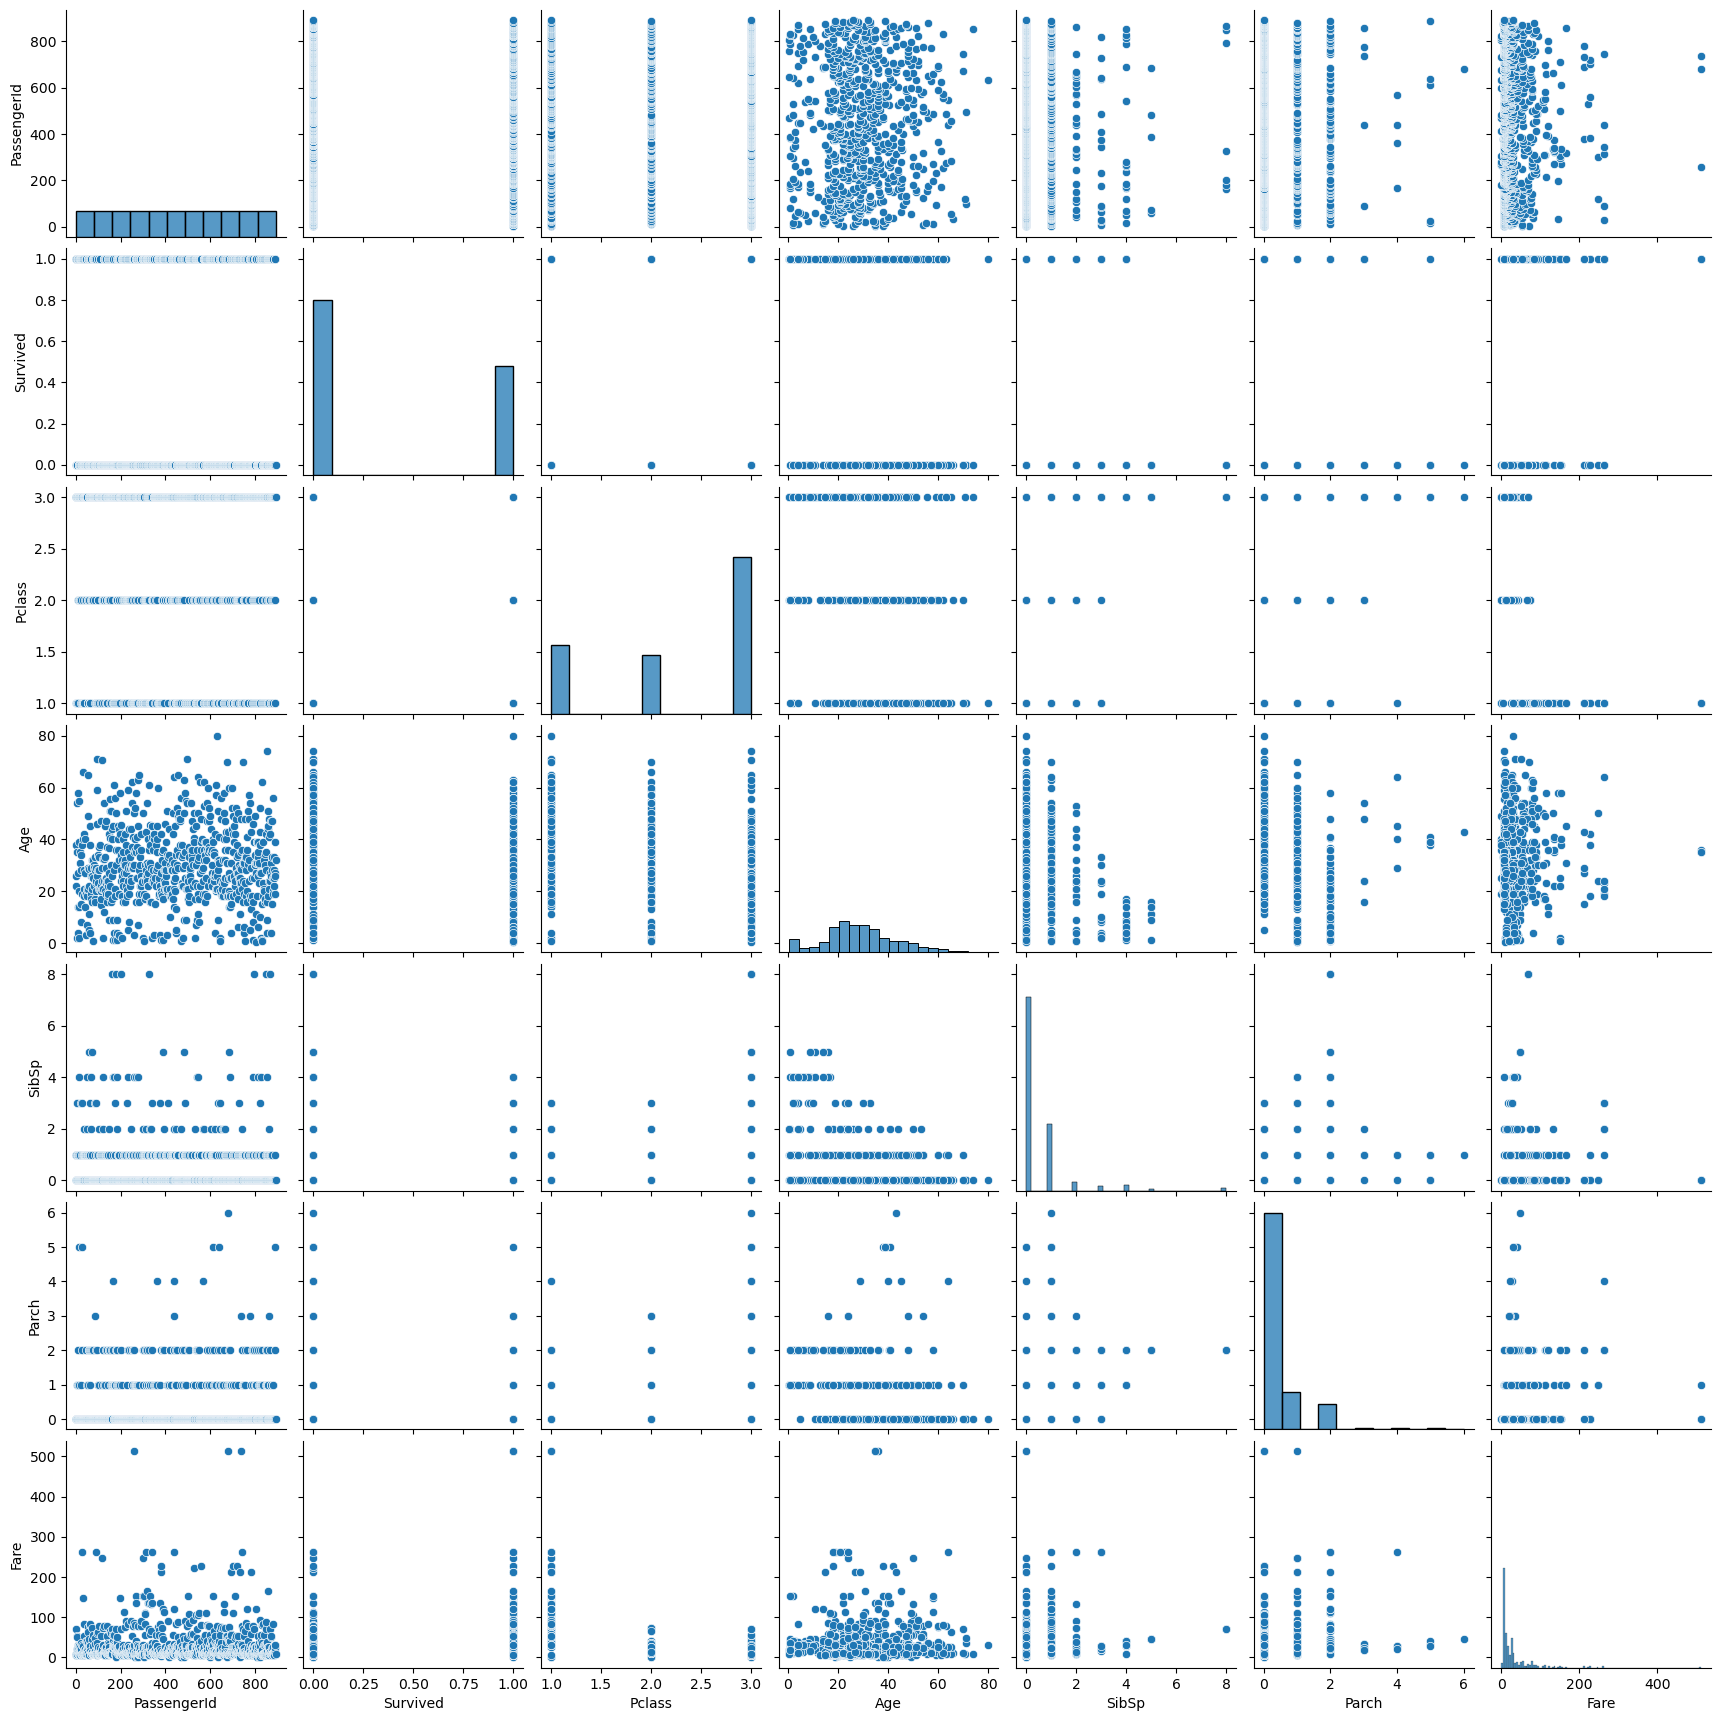

In [26]:
sns.pairplot(data)
plt.show()

<AxesSubplot:>

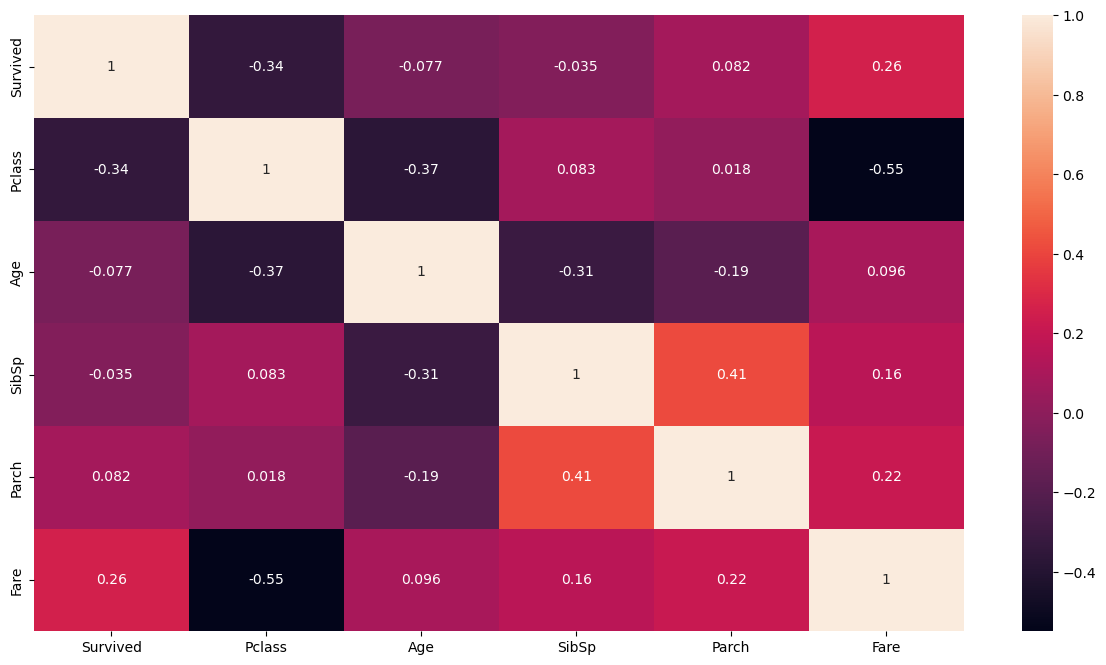

In [27]:
data1= data.drop(columns="PassengerId")
plt.subplots(figsize=(15,8))
sns.heatmap(data1.corr(),annot= True, linecolor='black')

### Impute missing values:-

In [28]:
#checking null values

data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

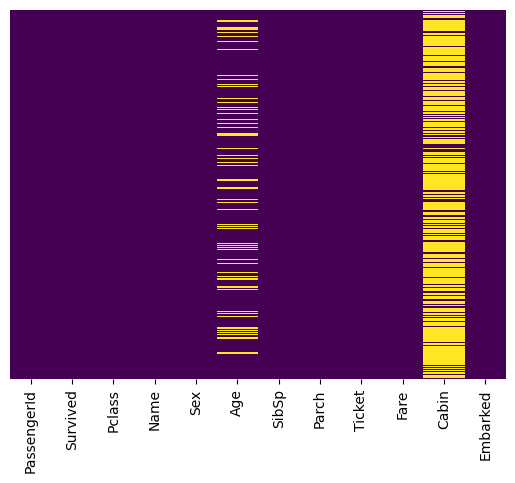

In [29]:
sns.heatmap(data.isnull(),cbar=False,cmap = 'viridis',yticklabels=False)

### Observations:

1.For 'Age', 'Cabin', 'Embarked' column null values are present.

#### Let's remove NULL:

#### 1. Remove NULL for 'Age' column

In [30]:
# percent of missing "Age"

print('Percent of missing "Age" records is:', ((data['Age'].isnull().sum()/data.shape[0])*100))

Percent of missing "Age" records is: 19.865319865319865


In [31]:
mean_age = data[['Pclass','Age']].groupby('Pclass').mean()
mean_age

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


In [32]:
def replace_age(x):
    
    pclass = x[0];age = x[1]
    if pd.isnull(age):
        if pclass == 1:
            return mean_age.loc[1]['Age']
        elif pclass == 2:
            return mean_age.loc[2]['Age']
        else:
            return mean_age.loc[3]['Age']
    else:
        return age
    

In [33]:
data['Age'] = data[['Pclass','Age']].apply(replace_age, axis=1)

### Observations:


Here we replace NULL value with mean of the column.

NO NULL data are present in 'Age' column.

#### 2. Remove NULL for 'Cabin' column

In [34]:
# percent of missing "Cabin"

print('Percent of missing "Cabin" records is ', ((data['Cabin'].isnull().sum()/data.shape[0])*100))

Percent of missing "Cabin" records is  77.10437710437711


Here 77% of records are missing.

This means that a lot of information is missig for "cabin" column. So we will ignore this variable in our model.

In [35]:
data.drop(columns= "Cabin", inplace= True)

### Observations:

Here we drop the "cabin" column with 77% NULL values from the given dataset.

So, NO NULL data are present for 'Cabin' column.

#### 3. Remove NULL for 'Embarked' column

S    644
C    168
Q     77
Name: Embarked, dtype: int64


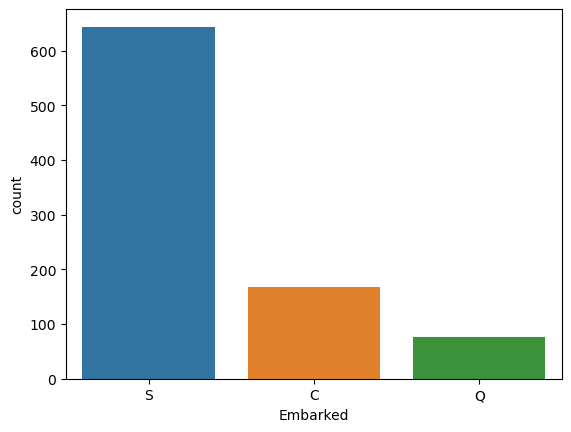

In [36]:
print(data['Embarked'].value_counts())
sns.countplot(data=data, x='Embarked')
plt.show()

Here the maximum "Embarked" data is "S".

So let's impute the Nan value with "S"(most frequent occurence of "Embarked")

In [37]:
data["Embarked"].fillna("S", inplace=True)

In [38]:
#check null

data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Observations:

Here we impute the "Embarked" column with most frequence occurence of "Embarked" column whih is "S".

So, NO NULL data are present for 'Embarked' column.

#### No NULL are present

### Checking duplicate:-

In [39]:
#checking duplicate

data.duplicated().sum()

0

### Observations:

No duplicate rows are present in the dataset.

In [40]:
#checking different statistical parameter

data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.292875,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.210527,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


### Observations:

### Replace 0(zero) value

Some 0 values are present for"Fare" column. Let's remove it.

In [42]:
mean_fare = data[['Pclass','Fare']].groupby('Pclass').mean()
mean_fare

,Fare
Pclass,
1,84.154687
2,20.662183
3,13.675550


In [43]:
def replace_fare(x):
    
    pclass = x[1]; Fare = x[0]
    
    if pd.isnull(Fare):
        if pclass == 1:
            return mean_fare.loc[1]['Fare']
        elif pclass == 2:
            return mean_fare.loc[2]['Fare']
        else:
            return mean_fare.loc[3]['Fare']
    else:
        return Fare

In [44]:
data['Fare'] = data['Fare'].replace(0,np.nan) 

data['Fare'] = data[["Fare","Pclass"]].apply(replace_fare, axis=1)

In [45]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.292875,0.523008,0.381594,32.876990
std,257.353842,0.486592,0.836071,13.210527,1.102743,0.806057,49.690114
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,4.012500
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.925000
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.500000
75%,668.500000,1.000000,3.000000,37.000000,1.000000,0.000000,31.275000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


No zero(0) are present in "Fare: column.

### Different feature distributions:

<AxesSubplot:xlabel='Age', ylabel='Density'>

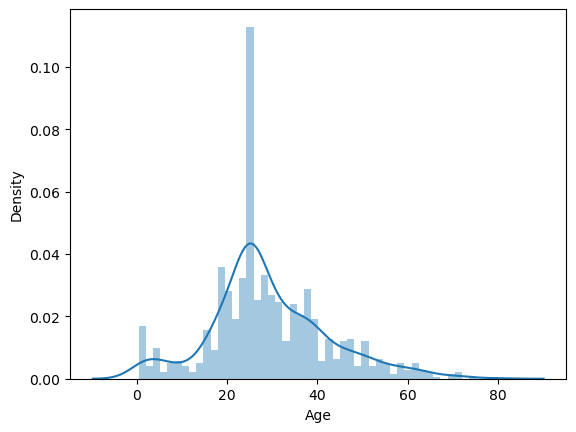

In [46]:
sns.distplot(data['Age'],kde = True,bins= 50)

<AxesSubplot:xlabel='Fare', ylabel='Density'>

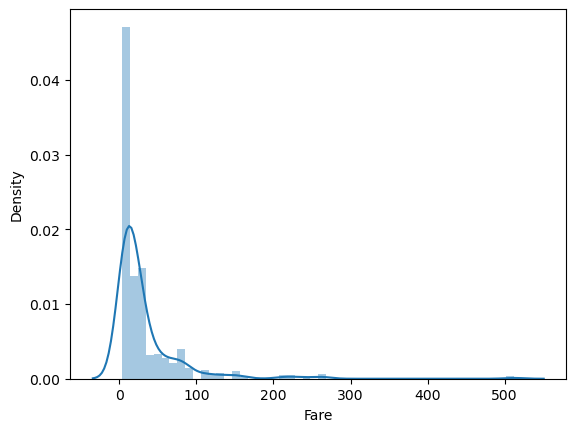

In [47]:
sns.distplot(data['Fare'],kde = True,bins= 50)

<AxesSubplot:xlabel='Parch', ylabel='Density'>

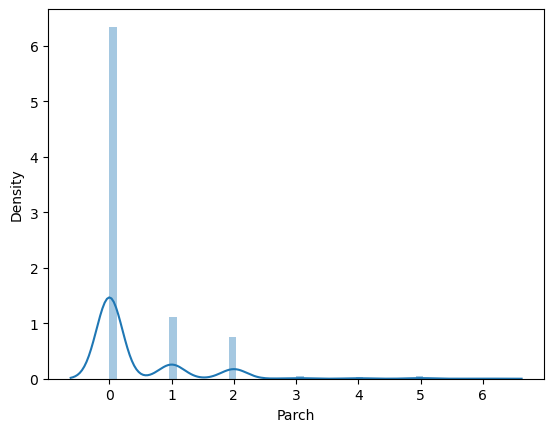

In [48]:
sns.distplot(data['Parch'],kde = True,bins= 50)

### Observations:

Max no of age in between 20-40 yrs.

Max no of passengers are in low fare (Pclass= 3)

Max no of Parch is 0.

In [49]:
# describe different statistical quantity all object columns

data.select_dtypes(include = "object").describe()

,Name,Sex,Ticket,Embarked
count,891,891,891,891
unique,891,2,681,3
top,"Braund, Mr. Owen Harris",male,347082,S
freq,1,577,7,646


In [50]:
data.groupby(["Survived","Sex","Pclass", "Embarked" ])["Survived"].count()

Survived  Sex     Pclass  Embarked
0         female  1       C             1
                          S             2
                  2       S             6
                  3       C             8
                          Q             9
                          S            55
          male    1       C            25
                          Q             1
                          S            51
                  2       C             8
                          Q             1
                          S            82
                  3       C            33
                          Q            36
                          S           231
1         female  1       C            42
                          Q             1
                          S            48
                  2       C             7
                          Q             2
                          S            61
                  3       C            15
                          Q            24

### Univariate analysis

Univarite analysis of the variable for which the datatype is float64, that is "Age" and "Fare".

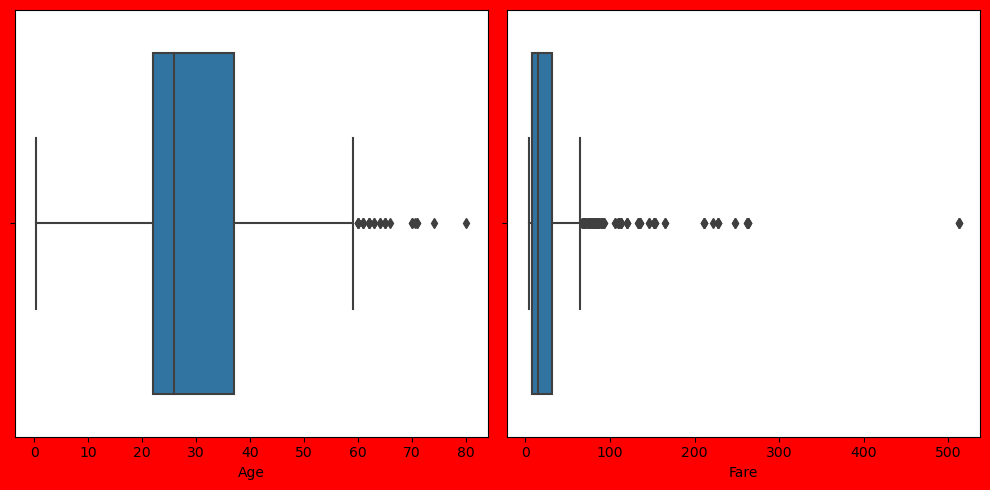

In [51]:
data1= data[["Age", "Fare"]]
plt.figure(figsize=(10,5),facecolor='red')
plno=1
for x in data1:
    if plno<=2:
        plt.subplot(1,2,plno)
        sns.boxplot(data1[x])
        plt.xlabel (x, fontsize=10)
    plno +=1
plt.tight_layout()

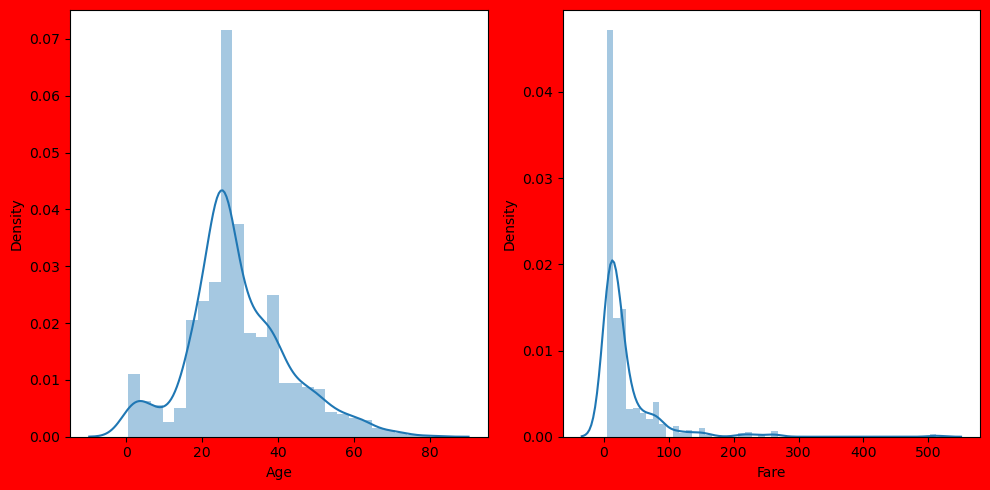

In [52]:
data1= data[["Age", "Fare"]]
plt.figure(figsize=(10,5),facecolor='red')
plno=1
for x in data1:
    if plno<=2:
        plt.subplot(1,2,plno)
        sns.distplot(data1[x])
        plt.xlabel (x, fontsize=10)
    plno +=1
plt.tight_layout()

### Observations:

Here we can see that both "Age" and "Fare" have skewness and they are right skewed and have outliers also.

But due to lose of information, let's keep all the data

### Bivariate Analysis:

<AxesSubplot:xlabel='Fare', ylabel='Age'>

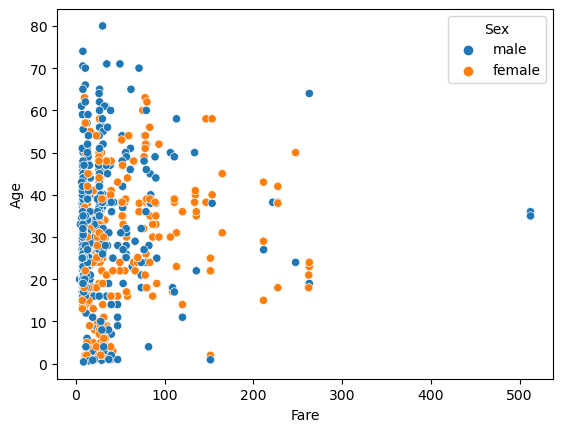

In [53]:
sns.scatterplot(x = "Fare",y = "Age", data = data, hue = "Sex", )

The passengers who paid fare> 100 were Female.

<AxesSubplot:xlabel='Fare', ylabel='Age'>

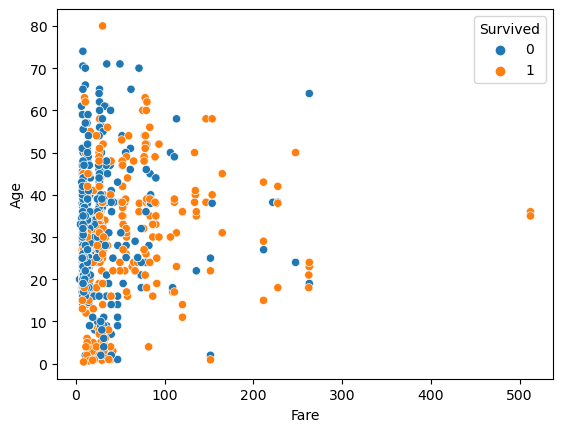

In [54]:
sns.scatterplot(x = "Fare",y = "Age", data = data, hue = "Survived")

### Observations:

The passengers who paid fare> 100 were survived.

The data with maximum number of occurrence of 'Parch' is 0.

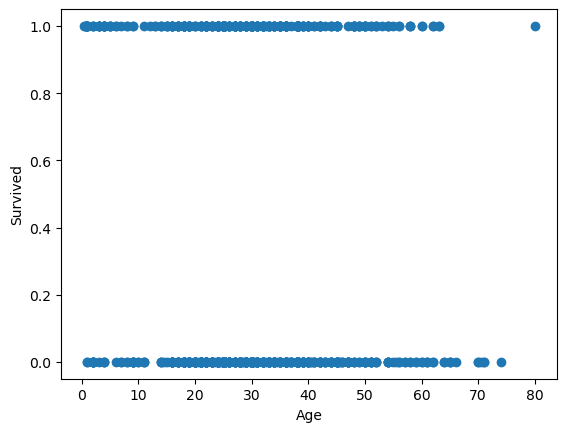

In [55]:
plt.scatter(data.Age, data.Survived)
plt.xlabel("Age")
plt.ylabel("Survived")
plt.show()

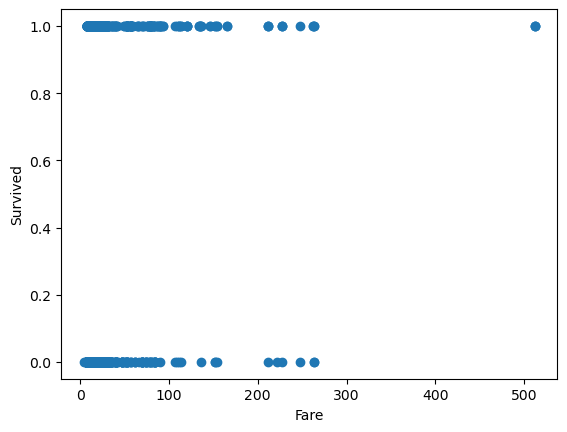

In [56]:
plt.scatter(data.Fare, data.Survived)
plt.xlabel("Fare")
plt.ylabel("Survived")
plt.show()

### Remove "PassengerID"

For prediction there is no need to keep the column "PassengerID" as it has no impact on prediction of "Survived".

So, drop it from the whole dataset.

In [57]:
data.drop(columns= "PassengerId", inplace= True)

### Encode the categorical features.

#### 1. For Name:

In [58]:
data.drop(columns= "Name", inplace= True)

For prediction there is no need to keep the column "Name" as there is no relation between "Name" and "Survived"

So , drop it from the whole dataset.

#### 2. For Sex and Embarked:

In [59]:
# Using Label encoder for transforming Categorical data

categorical= ["Sex", "Embarked"]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in categorical:
    data[i] = le.fit_transform(data[i])
data.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,1,22.0,1,0,A/5 21171,7.2500,2
1,1,1,0,38.0,1,0,PC 17599,71.2833,0
2,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,1,1,0,35.0,1,0,113803,53.1000,2
4,0,3,1,35.0,0,0,373450,8.0500,2


#### 3. For Ticket:

For prediction there is no need to keep the column "Ticket" as there is no relation between "Ticket" and "Survived".

So , drop it from the whole dataset.

In [60]:
data.drop(columns= "Ticket", inplace= True)

In [61]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.00000,1,0,7.2500,2
1,1,1,0,38.00000,1,0,71.2833,0
2,1,3,0,26.00000,0,0,7.9250,2
3,1,1,0,35.00000,1,0,53.1000,2
4,0,3,1,35.00000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.00000,0,0,13.0000,2
887,1,1,0,19.00000,0,0,30.0000,2
888,0,3,0,25.14062,1,2,23.4500,2
889,1,1,1,26.00000,0,0,30.0000,0


### Data cleaning:

Here , the columns 'sibsp' and 'parch' are the information related to the family.

Let's merge them into 1 columns named 'Family_member' and also remove the complexity of the whole dataset.

In [62]:
data["Family_member"] = data["SibSp"]+data["Parch"]

data.drop(columns=["SibSp","Parch"], inplace= True)
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_member
0,0,3,1,22.0,7.2500,2,1
1,1,1,0,38.0,71.2833,0,1
2,1,3,0,26.0,7.9250,2,0
3,1,1,0,35.0,53.1000,2,1
4,0,3,1,35.0,8.0500,2,0


In [63]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked',
       'Family_member'],
      dtype='object')

### Data Imbalance Checking

In [64]:
from collections import Counter
Counter(data['Survived'])

Counter({0: 549, 1: 342})

In [65]:
print('Percent of not survived passengers is:', ((549/data.shape[0])*100))

Percent of not survived passengers is: 61.61616161616161


In [66]:
print('Percent of survived passengers is:', ((342/data.shape[0])*100))

Percent of survived passengers is: 38.38383838383838


### Observations:

[Acceptable outcomes ratio is 60:40]

Here the percentage of not survived and survived passengers is arround 60:40, which is acceptable.

### Remove outliers:

In [67]:
data.skew()

Survived         0.478523
Pclass          -0.630548
Sex             -0.618921
Age              0.509545
Fare             4.758277
Embarked        -1.264823
Family_member    2.727441
dtype: float64

In [68]:
#1st quantile
q1= data. quantile(0.25)
#3rd quantile
q3= data. quantile(0.75)
#IQR
iqr= q3-q1

In [69]:
# determine higher value (Age_h) from Age column using IQR 

Age_h=(q3.Age+(1.5*iqr.Age))

# Extract the index no of the data for which the Age value is higher than Age_h

index=np.where(data['Age']>Age_h)

#Drop the data with the specified index number

#data=data.drop(data.index[index])

#Reset the index number

#data.reset_index()

index

(array([ 33,  54,  96, 116, 170, 252, 275, 280, 326, 366, 438, 456, 483,
        493, 545, 555, 570, 587, 625, 630, 672, 684, 694, 745, 829, 851],
       dtype=int64),)

In [70]:
# determine higher value (Fare_h) from Fare column using IQR 

Fare_h=(q3.Fare+(1.5*iqr.Fare))

# Extract the index no of the data for which the Fare value is higher than Fare_h

index1=np.where(data['Fare']>Fare_h)

#Drop the data with the specified index number

#data=data.drop(data.index[index1])

#Reset the index number

#data.reset_index()
index1

(array([  1,  27,  31,  34,  52,  61,  62,  72,  88, 102, 118, 120, 124,
        139, 151, 159, 180, 195, 201, 215, 218, 224, 230, 245, 256, 257,
        258, 262, 263, 268, 269, 275, 290, 291, 297, 299, 305, 306, 307,
        310, 311, 318, 319, 324, 325, 332, 334, 336, 337, 341, 366, 369,
        373, 375, 377, 380, 385, 390, 393, 412, 435, 438, 445, 453, 484,
        486, 496, 498, 504, 505, 520, 527, 537, 540, 544, 550, 557, 558,
        581, 585, 587, 591, 609, 627, 633, 641, 645, 655, 659, 660, 665,
        679, 681, 689, 698, 700, 708, 716, 730, 737, 741, 742, 745, 759,
        763, 765, 779, 789, 792, 802, 806, 815, 820, 822, 829, 835, 846,
        849, 856, 863, 879], dtype=int64),)

In [71]:
print("Before conversion: ", index)
print(type(index))
 
# Converting numpy to list
index = list(index)
print("\nAfter conversion: ", type(index))
print(index)

Before conversion:  (array([ 33,  54,  96, 116, 170, 252, 275, 280, 326, 366, 438, 456, 483,
       493, 545, 555, 570, 587, 625, 630, 672, 684, 694, 745, 829, 851],
      dtype=int64),)
<class 'tuple'>

After conversion:  <class 'list'>
[array([ 33,  54,  96, 116, 170, 252, 275, 280, 326, 366, 438, 456, 483,
       493, 545, 555, 570, 587, 625, 630, 672, 684, 694, 745, 829, 851],
      dtype=int64)]


In [72]:
print("Before conversion: ", index1)
print(type(index1))
 
# Converting numpy to list
index1 = list(index1)
print("\nAfter conversion: ", type(index1))
print(index1)

Before conversion:  (array([  1,  27,  31,  34,  52,  61,  62,  72,  88, 102, 118, 120, 124,
       139, 151, 159, 180, 195, 201, 215, 218, 224, 230, 245, 256, 257,
       258, 262, 263, 268, 269, 275, 290, 291, 297, 299, 305, 306, 307,
       310, 311, 318, 319, 324, 325, 332, 334, 336, 337, 341, 366, 369,
       373, 375, 377, 380, 385, 390, 393, 412, 435, 438, 445, 453, 484,
       486, 496, 498, 504, 505, 520, 527, 537, 540, 544, 550, 557, 558,
       581, 585, 587, 591, 609, 627, 633, 641, 645, 655, 659, 660, 665,
       679, 681, 689, 698, 700, 708, 716, 730, 737, 741, 742, 745, 759,
       763, 765, 779, 789, 792, 802, 806, 815, 820, 822, 829, 835, 846,
       849, 856, 863, 879], dtype=int64),)
<class 'tuple'>

After conversion:  <class 'list'>
[array([  1,  27,  31,  34,  52,  61,  62,  72,  88, 102, 118, 120, 124,
       139, 151, 159, 180, 195, 201, 215, 218, 224, 230, 245, 256, 257,
       258, 262, 263, 268, 269, 275, 290, 291, 297, 299, 305, 306, 307,
       310, 311, 318

In [73]:
common_elements = np.intersect1d(index, index1)
print(common_elements) #array

[275 366 438 587 745 829]


In [74]:
data2= data.drop([275,366,438, 587, 745, 829])

In [75]:
data2

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_member
0,0,3,1,22.00000,7.2500,2,1
1,1,1,0,38.00000,71.2833,0,1
2,1,3,0,26.00000,7.9250,2,0
3,1,1,0,35.00000,53.1000,2,1
4,0,3,1,35.00000,8.0500,2,0
...,...,...,...,...,...,...,...
886,0,2,1,27.00000,13.0000,2,0
887,1,1,0,19.00000,30.0000,2,0
888,0,3,0,25.14062,23.4500,2,3
889,1,1,1,26.00000,30.0000,0,0


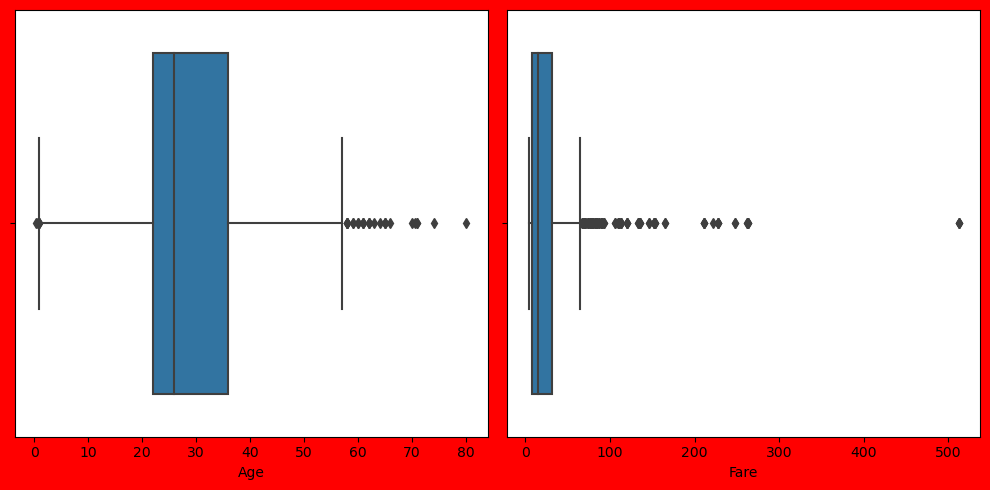

In [76]:
data1= data2[["Age", "Fare"]]
plt.figure(figsize=(10,5),facecolor='red')
plno=1
for x in data1:
    if plno<=2:
        plt.subplot(1,2,plno)
        sns.boxplot(data1[x])
        plt.xlabel (x, fontsize=10)
    plno +=1
plt.tight_layout()

In [77]:
data2.skew()

Survived         0.486891
Pclass          -0.650023
Sex             -0.623529
Age              0.472077
Fare             4.863729
Embarked        -1.269230
Family_member    2.746572
dtype: float64

### Data Standarization

In [78]:
#seperate Features(x) and Lable(y)

x= data2.drop('Survived', axis=1)
y= data2["Survived"]

#data standarization

from sklearn.preprocessing import StandardScaler
stdscaler= StandardScaler()
x_scale = stdscaler.fit_transform(x)

### Final predictions using different Regression ML Models

#### Find best Random state:

In [79]:
from sklearn.linear_model import LogisticRegression

acc_max=0
random_max=0
for i in range(1,1000):
    x_train,x_test,y_train,y_test = train_test_split(x_scale,y,test_size = 0.25, random_state=i)
    log= LogisticRegression()
    log.fit(x_train,y_train)
    y_pred=log.predict(x_test)
    acc= accuracy_score(y_test,y_pred)
    if acc>acc_max:
        acc_max=acc
        random_max=i
print('Best accuracy is', acc_max ,'on Random_state', random_max)

Best accuracy is 0.8828828828828829 on Random_state 5


In [80]:
print('Training feature shape:',x_train.shape)
print('Training target shape:',y_train.shape)
print('Test feature shape:',x_test.shape)
print('Test target shape:',y_test.shape)

Training feature shape: (663, 6)
Training target shape: (663,)
Test feature shape: (222, 6)
Test target shape: (222,)


### Using LogisticRegression()

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
x_train,x_test,y_train,y_test = train_test_split(x_scale,y,test_size = 0.25, random_state=5)

log = LogisticRegression()

log.fit(x_train, y_train)

y_pred = log.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print ('cof_mat:\n ', confusion_matrix(y_test, y_pred))
print('classification report:\n ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', log.score(x_train, y_train))
print('testing score : ', log.score(x_test, y_test))
print('AUC_ROC_score:', roc_auc_score(y_pred,y_test))

accu score :  0.8828828828828829
cof_mat:
  [[135   7]
 [ 19  61]]
classification report:
                precision    recall  f1-score   support

           0       0.88      0.95      0.91       142
           1       0.90      0.76      0.82        80

    accuracy                           0.88       222
   macro avg       0.89      0.86      0.87       222
weighted avg       0.88      0.88      0.88       222

-----------
-----------
Mean absolute error: 0.11711711711711711
Mean square error: 0.11711711711711711
Root mean square error: 0.34222378222022665
R2 Score: 0.4919014084507043
-----------
-----------
training score :  0.7903469079939668
testing score :  0.8828828828828829
AUC_ROC_score: 0.8868411000763942


### Cross validation:

In [82]:
from sklearn.model_selection import cross_val_score
cvscore = cross_val_score(log,x_scale, y, cv =9)

print("CVScore :" ,cvscore)
print("Mean CV Score :",cvscore.mean())
print("Std deviation :",cvscore.std())

CVScore : [0.77777778 0.7979798  0.7979798  0.85714286 0.79591837 0.76530612
 0.80612245 0.78571429 0.82653061]
Mean CV Score : 0.8011635630683249
Std deviation : 0.025649074207055943


### Use GridSearchCV for hyperparameter tuning:

In [83]:
from sklearn.model_selection import GridSearchCV
grid = dict(solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],penalty=['l2','l1', 'elasticnet'], C=[100, 10, 1.0, 0.1, 0.01]
           , max_iter=[100, 140, 180,80])

grid_log = GridSearchCV(estimator=log, param_grid= grid, cv=7 )

grid_log.fit(x_train, y_train)

GridSearchCV(cv=7, estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'max_iter': [100, 140, 180, 80],
                         'penalty': ['l2', 'l1', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [84]:
print('best params : ', grid_log.best_params_)
grid_log_best = grid_log.best_estimator_
grid_log_best.fit(x_train, y_train)

best params :  {'C': 1.0, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}


LogisticRegression(penalty='l1', solver='saga')

In [85]:
y_pred = grid_log_best.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print ('cof_mat:\n ', confusion_matrix(y_test, y_pred))
print('classification report:\n ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', grid_log_best.score(x_train, y_train))
print('testing score : ', grid_log_best.score(x_test, y_test))
print('AUC_ROC_score:', roc_auc_score(y_pred,y_test))

accu score :  0.8828828828828829
cof_mat:
  [[135   7]
 [ 19  61]]
classification report:
                precision    recall  f1-score   support

           0       0.88      0.95      0.91       142
           1       0.90      0.76      0.82        80

    accuracy                           0.88       222
   macro avg       0.89      0.86      0.87       222
weighted avg       0.88      0.88      0.88       222

-----------
-----------
Mean absolute error: 0.11711711711711711
Mean square error: 0.11711711711711711
Root mean square error: 0.34222378222022665
R2 Score: 0.4919014084507043
-----------
-----------
training score :  0.7888386123680241
testing score :  0.8828828828828829
AUC_ROC_score: 0.8868411000763942


Accuracy score, training score, testing score etc are not changed after using GridSearchCV with LogisticRegression().

### Using DecisionTreeClassifier()

In [86]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', clf.score(x_train, y_train))
print('testing score : ', clf.score(x_test, y_test))
print('AUC_ROC_score:', roc_auc_score(y_pred,y_test))

accu score :  0.8063063063063063


cof_mat:  [[121  21]
 [ 22  58]]


classification report:                precision    recall  f1-score   support

           0       0.85      0.85      0.85       142
           1       0.73      0.72      0.73        80

    accuracy                           0.81       222
   macro avg       0.79      0.79      0.79       222
weighted avg       0.81      0.81      0.81       222

-----------
-----------
Mean absolute error: 0.19369369369369369
Mean square error: 0.19369369369369369
Root mean square error: 0.44010645722790037
R2 Score: 0.1596830985915495
-----------
-----------
training score :  0.9894419306184012
testing score :  0.8063063063063063
AUC_ROC_score: 0.7901655306718597


### Cross validation:

In [87]:
cvscore = cross_val_score(clf,x_scale, y, cv =9)

print("CVScore :" ,cvscore)
print("Mean CV Score :",cvscore.mean())
print("Std deviation :",cvscore.std())

CVScore : [0.6969697  0.76767677 0.74747475 0.7755102  0.80612245 0.73469388
 0.82653061 0.76530612 0.84693878]
Mean CV Score : 0.77413591699306
Std deviation : 0.04398395038348776


### Use GridSearchCV for hyperparameter tuning:

In [88]:
param = {'criterion' : ['gini', 'entropy', 'log_loss'],
    'min_samples_split' : range(1,4), 'splitter': ["best", "random"],
    'min_samples_leaf' : range(1,7),
        'ccp_alpha': [0.1, .01, .001, 10, 0.0001,1, 0.5],
        'max_features': ['auto', 'sqrt', 'log2']}

grid_search = GridSearchCV(estimator = clf, cv=9, param_grid = param)

grid_search.fit(x_train, y_train)

GridSearchCV(cv=9, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001, 10, 0.0001, 1, 0.5],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': range(1, 7),
                         'min_samples_split': range(1, 4),
                         'splitter': ['best', 'random']})

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org

In [89]:
print('best params : ', grid_search.best_params_)

grid_clf_best = grid_search.best_estimator_
grid_clf_best.fit(x_train, y_train)

best params :  {'ccp_alpha': 0.0001, 'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 3, 'splitter': 'best'}


DecisionTreeClassifier(ccp_alpha=0.0001, max_features='sqrt',
                       min_samples_leaf=5, min_samples_split=3)

In [90]:
#best params :  {'ccp_alpha': 0.001, 'criterion': 'gini', 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}

y_pred = grid_clf_best.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', grid_clf_best.score(x_train, y_train))
print('testing score : ', grid_clf_best.score(x_test, y_test))
print('AUC_ROC_score:', roc_auc_score(y_pred,y_test))

accu score :  0.7702702702702703


cof_mat:  [[123  19]
 [ 32  48]]


classification report:                precision    recall  f1-score   support

           0       0.79      0.87      0.83       142
           1       0.72      0.60      0.65        80

    accuracy                           0.77       222
   macro avg       0.75      0.73      0.74       222
weighted avg       0.77      0.77      0.77       222

-----------
-----------
Mean absolute error: 0.22972972972972974
Mean square error: 0.22972972972972974
Root mean square error: 0.4793012932694108
R2 Score: 0.003345070422535401
-----------
-----------
training score :  0.8446455505279035
testing score :  0.7702702702702703
AUC_ROC_score: 0.7549831487722677


Accuracy score, training score, testing score, AUC ROC score etc are improved after using GridSearchCV with DecisionTreeClassifier().

### Using KNeighborsClassifier()

In [91]:
from sklearn.neighbors import KNeighborsClassifier

knn =KNeighborsClassifier()

knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', knn.score(x_train, y_train))
print('testing score : ', knn.score(x_test, y_test))
print('AUC_ROC_score:', roc_auc_score(y_pred,y_test))

accu score :  0.8513513513513513


cof_mat:  [[130  12]
 [ 21  59]]


classification report:                precision    recall  f1-score   support

           0       0.86      0.92      0.89       142
           1       0.83      0.74      0.78        80

    accuracy                           0.85       222
   macro avg       0.85      0.83      0.83       222
weighted avg       0.85      0.85      0.85       222

-----------
-----------
Mean absolute error: 0.14864864864864866
Mean square error: 0.14864864864864866
Root mean square error: 0.3855498004780299
R2 Score: 0.355105633802817
-----------
-----------
training score :  0.8567119155354449
testing score :  0.8513513513513513
AUC_ROC_score: 0.8459565339054193


### Cross Validation:

In [92]:
cvscore = cross_val_score(knn,x_scale, y, cv =9)

print("CVScore :" ,cvscore)
print("Mean CV Score :",cvscore.mean())
print("Std deviation :",cvscore.std())

CVScore : [0.78787879 0.78787879 0.81818182 0.86734694 0.79591837 0.83673469
 0.80612245 0.85714286 0.79591837]
Mean CV Score : 0.8170136741565314
Std deviation : 0.02836350933295456


In [93]:
from sklearn.ensemble import BaggingClassifier
bagging_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=10), bootstrap=True,
                          n_estimators=19, max_samples=0.8, oob_score=True, random_state=540)

bagging_knn.fit(x_train, y_train)

print("Bagging Score: ", bagging_knn.score(x_test, y_test))

y_pred = bagging_knn.predict(x_test)


print('accu score: \n ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: \n', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: ', classification_report(y_test, y_pred))

Bagging Score:  0.8333333333333334
accu score: 
  0.8333333333333334


cof_mat: 
 [[130  12]
 [ 25  55]]


classification report:                precision    recall  f1-score   support

           0       0.84      0.92      0.88       142
           1       0.82      0.69      0.75        80

    accuracy                           0.83       222
   macro avg       0.83      0.80      0.81       222
weighted avg       0.83      0.83      0.83       222



In [94]:
pasting_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=10),bootstrap=False,
                          n_estimators=19, max_samples=0.8,  random_state=540)

pasting_knn.fit(x_train, y_train)

print("Pasting Score: ", pasting_knn.score(x_test, y_test))

y_pred = pasting_knn.predict(x_test)


print('accu score :\n ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: \n', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report:\n ', classification_report(y_test, y_pred))

Pasting Score:  0.8243243243243243
accu score :
  0.8243243243243243


cof_mat: 
 [[128  14]
 [ 25  55]]


classification report:
                precision    recall  f1-score   support

           0       0.84      0.90      0.87       142
           1       0.80      0.69      0.74        80

    accuracy                           0.82       222
   macro avg       0.82      0.79      0.80       222
weighted avg       0.82      0.82      0.82       222



### Use GridSearchCV for hyperparameter tuning:

In [95]:
from sklearn.model_selection import GridSearchCV
param = {'algorithm' : ['kd_tree','brute', 'ball_tree'],
             'leaf_size' : [30,42,50,20,45],
             'n_neighbors' : [3,7,9,5,11],'weights': ['uniform', 'distance']}
    

gridsearchknn = GridSearchCV(estimator = knn, param_grid=param, n_jobs=-1, cv=10)

gridsearchknn.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['kd_tree', 'brute', 'ball_tree'],
                         'leaf_size': [30, 42, 50, 20, 45],
                         'n_neighbors': [3, 7, 9, 5, 11],
                         'weights': ['uniform', 'distance']})

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org

In [96]:
print('best params : ', gridsearchknn.best_params_)

grid_knn_best = gridsearchknn.best_estimator_
grid_knn_best.fit(x_train, y_train)

best params :  {'algorithm': 'kd_tree', 'leaf_size': 30, 'n_neighbors': 7, 'weights': 'uniform'}


KNeighborsClassifier(algorithm='kd_tree', n_neighbors=7)

In [97]:
y_pred = grid_knn_best.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', grid_knn_best.score(x_train, y_train))
print('testing score : ', grid_knn_best.score(x_test, y_test))
print('AUC_ROC_score:', roc_auc_score(y_pred,y_test))

accu score :  0.8558558558558559


cof_mat:  [[132  10]
 [ 22  58]]


classification report:                precision    recall  f1-score   support

           0       0.86      0.93      0.89       142
           1       0.85      0.72      0.78        80

    accuracy                           0.86       222
   macro avg       0.86      0.83      0.84       222
weighted avg       0.86      0.86      0.85       222

-----------
-----------
Mean absolute error: 0.14414414414414414
Mean square error: 0.14414414414414414
Root mean square error: 0.3796631983009996
R2 Score: 0.37464788732394383
-----------
-----------
training score :  0.8371040723981901
testing score :  0.8558558558558559
AUC_ROC_score: 0.8550420168067228


Accuracy score,testing score, AUC ROC score etc are slightly improved after using GridSearchCV with DecisionTreeClassifier().

### Using GradientBoostingClassifier()

In [98]:
from sklearn.ensemble import GradientBoostingClassifier

gbdt= GradientBoostingClassifier()
gbdt.fit(x_train, y_train)

y_pred = gbdt.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', gbdt.score(x_train, y_train))
print('testing score : ', gbdt.score(x_test, y_test))
print('AUC_ROC_score:', roc_auc_score(y_pred,y_test))

accu score :  0.8423423423423423


cof_mat:  [[133   9]
 [ 26  54]]


classification report:                precision    recall  f1-score   support

           0       0.84      0.94      0.88       142
           1       0.86      0.68      0.76        80

    accuracy                           0.84       222
   macro avg       0.85      0.81      0.82       222
weighted avg       0.84      0.84      0.84       222

-----------
-----------
Mean absolute error: 0.15765765765765766
Mean square error: 0.15765765765765766
Root mean square error: 0.3970612769556579
R2 Score: 0.3160211267605635
-----------
-----------
training score :  0.9019607843137255
testing score :  0.8423423423423423
AUC_ROC_score: 0.8468104222821204


### Cross validation:

In [99]:
cvscore = cross_val_score(knn,x_scale, y, cv =9)

print("CVScore :" ,cvscore)
print("Mean CV Score :",cvscore.mean())
print("Std deviation :",cvscore.std())

CVScore : [0.78787879 0.78787879 0.81818182 0.86734694 0.79591837 0.83673469
 0.80612245 0.85714286 0.79591837]
Mean CV Score : 0.8170136741565314
Std deviation : 0.02836350933295456


### Use GridSearchCV for hyperparameter tuning:

In [100]:
param= {"min_samples_split" : [2,1,3], "max_depth":[3,5,7], "learning_rate": [0.1,0.01,10], 
        "n_estimators": [100, 120, 80, 150],"min_samples_leaf" :[1,2,3]}

grid_gbdt= GridSearchCV (gbdt, param_grid= param)

grid_gbdt.fit(x_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.01, 10],
                         'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 1, 3],
                         'n_estimators': [100, 120, 80, 150]})

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [101]:
print('best params : ', grid_gbdt.best_params_)

grid_gbdt_best = grid_gbdt.best_estimator_
grid_gbdt_best.fit(x_train, y_train)

best params :  {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 100}


GradientBoostingClassifier(min_samples_leaf=3, min_samples_split=3)

In [102]:
y_pred = grid_gbdt_best.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', grid_gbdt_best.score(x_train, y_train))
print('testing score : ', grid_gbdt_best.score(x_test, y_test))
print('AUC_ROC_score:', roc_auc_score(y_pred,y_test))

accu score :  0.8513513513513513


cof_mat:  [[135   7]
 [ 26  54]]


classification report:                precision    recall  f1-score   support

           0       0.84      0.95      0.89       142
           1       0.89      0.68      0.77        80

    accuracy                           0.85       222
   macro avg       0.86      0.81      0.83       222
weighted avg       0.86      0.85      0.85       222

-----------
-----------
Mean absolute error: 0.14864864864864866
Mean square error: 0.14864864864864866
Root mean square error: 0.3855498004780299
R2 Score: 0.355105633802817
-----------
-----------
training score :  0.8974358974358975
testing score :  0.8513513513513513
AUC_ROC_score: 0.8618776092047654


Accuracy score, training score, testing score, AUC ROC score etc are slightly improved after using GridSearchCV with GradientBoostingClassifier()

### Using SVC('rbf')

In [103]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

def svmkernel(ker):
    #svc = SVC(kernel = ker )
    pipe = Pipeline([('PCA', PCA()),
                ('SVM', SVC(C=7, gamma=0.01, kernel = ker))])
    #svc.fit(x_train, y_train)
    #svc.score(x_train, y_train)
    pipe.fit(x_train, y_train)
    pipe.score(x_train, y_train)
    predsvc = pipe.predict(x_test)
    print('accu score : ', accuracy_score(y_test, y_pred))
    print("\n")
    print ('cof_mat: ', confusion_matrix(y_test, y_pred))
    print("\n")
    print('classification report: ', classification_report(y_test, y_pred))
    
    print("-----------")
    print("-----------")
    
    print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
    print('Mean square error:', mean_squared_error(y_test, y_pred))
    print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))
    print('R2 Score:', r2_score(y_test, y_pred))
    
    print("-----------")
    print("-----------")
    
    print('training score : ', pipe.score(x_train, y_train))
    print('testing score : ', pipe.score(x_test, y_test))
    print('AUC_ROC_score:', roc_auc_score(y_pred,y_test))

In [104]:
svmkernel('rbf')

accu score :  0.8513513513513513


cof_mat:  [[135   7]
 [ 26  54]]


classification report:                precision    recall  f1-score   support

           0       0.84      0.95      0.89       142
           1       0.89      0.68      0.77        80

    accuracy                           0.85       222
   macro avg       0.86      0.81      0.83       222
weighted avg       0.86      0.85      0.85       222

-----------
-----------
Mean absolute error: 0.14864864864864866
Mean square error: 0.14864864864864866
Root mean square error: 0.3855498004780299
R2 Score: 0.355105633802817
-----------
-----------
training score :  0.7918552036199095
testing score :  0.8603603603603603
AUC_ROC_score: 0.8618776092047654


### Cross Validation

In [105]:
svm_rbf = Pipeline([('PCA', PCA()),
                ('SVM', SVC(C=7, gamma=0.01, kernel = "rbf"))])
cvscore = cross_val_score(svm_rbf,x_scale, y, cv =9)
print("CVScore :" ,cvscore)
print("Mean CV Score :",cvscore.mean())
print("Std deviation :",cvscore.std())

CVScore : [0.80808081 0.80808081 0.75757576 0.87755102 0.75510204 0.78571429
 0.78571429 0.82653061 0.79591837]
Mean CV Score : 0.8000297762202524
Std deviation : 0.035101584588883544


### Using SVC('poly')

In [106]:
svmkernel('poly')

accu score :  0.8513513513513513


cof_mat:  [[135   7]
 [ 26  54]]


classification report:                precision    recall  f1-score   support

           0       0.84      0.95      0.89       142
           1       0.89      0.68      0.77        80

    accuracy                           0.85       222
   macro avg       0.86      0.81      0.83       222
weighted avg       0.86      0.85      0.85       222

-----------
-----------
Mean absolute error: 0.14864864864864866
Mean square error: 0.14864864864864866
Root mean square error: 0.3855498004780299
R2 Score: 0.355105633802817
-----------
-----------
training score :  0.6199095022624435
testing score :  0.6576576576576577
AUC_ROC_score: 0.8618776092047654


### Cross Validation

In [107]:
svm_poly = Pipeline([('PCA', PCA()),
                ('SVM', SVC(C=7, gamma=0.01, kernel = "poly"))])
cvscore = cross_val_score(svm_poly,x_scale, y, cv =9)
print("CVScore :" ,cvscore)
print("Mean CV Score :",cvscore.mean())
print("Std deviation :",cvscore.std())

CVScore : [0.61616162 0.62626263 0.63636364 0.65306122 0.62244898 0.62244898
 0.63265306 0.63265306 0.6122449 ]
Mean CV Score : 0.6282553425410569
Std deviation : 0.01151688248817445


### Using SVC('linear')

In [108]:
svmkernel('linear')

accu score :  0.8513513513513513


cof_mat:  [[135   7]
 [ 26  54]]


classification report:                precision    recall  f1-score   support

           0       0.84      0.95      0.89       142
           1       0.89      0.68      0.77        80

    accuracy                           0.85       222
   macro avg       0.86      0.81      0.83       222
weighted avg       0.86      0.85      0.85       222

-----------
-----------
Mean absolute error: 0.14864864864864866
Mean square error: 0.14864864864864866
Root mean square error: 0.3855498004780299
R2 Score: 0.355105633802817
-----------
-----------
training score :  0.770739064856712
testing score :  0.8333333333333334
AUC_ROC_score: 0.8618776092047654


### Cross Validation:

In [109]:
svm_linear = Pipeline([('PCA', PCA()),
                ('SVM', SVC(C=7, gamma=0.01, kernel = "linear"))])
cvscore = cross_val_score(svm_linear ,x_scale, y, cv =9)
print("CVScore :" ,cvscore)
print("Mean CV Score :",cvscore.mean())
print("Std deviation :",cvscore.std())

CVScore : [0.81818182 0.77777778 0.76767677 0.87755102 0.75510204 0.76530612
 0.75510204 0.79591837 0.76530612]
Mean CV Score : 0.7864357864357864
Std deviation : 0.03753977189062544


#### svmkernel('rbf') is better than other in SVM

### Using RandomForestClassifier()

In [110]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', rf.score(x_train, y_train))
print('testing score : ', rf.score(x_test, y_test))
print('AUC_ROC_score:', roc_auc_score(y_pred,y_test))

accu score :  0.8333333333333334


cof_mat:  [[125  17]
 [ 20  60]]


classification report:                precision    recall  f1-score   support

           0       0.86      0.88      0.87       142
           1       0.78      0.75      0.76        80

    accuracy                           0.83       222
   macro avg       0.82      0.82      0.82       222
weighted avg       0.83      0.83      0.83       222

-----------
-----------
Mean absolute error: 0.16666666666666666
Mean square error: 0.16666666666666666
Root mean square error: 0.408248290463863
R2 Score: 0.27693661971830996
-----------
-----------
training score :  0.9894419306184012
testing score :  0.8333333333333334
AUC_ROC_score: 0.8206448723690103


### Cross Validation

In [111]:
cvscore = cross_val_score(rf ,x_scale, y, cv =9)
print("CVScore :" ,cvscore)
print("Mean CV Score :",cvscore.mean())
print("Std deviation :",cvscore.std())

CVScore : [0.74747475 0.7979798  0.78787879 0.87755102 0.83673469 0.79591837
 0.79591837 0.83673469 0.83673469]
Mean CV Score : 0.8125472411186697
Std deviation : 0.03588376487514104


### Use GridSearchCV for hyperparameter tuning:

In [112]:
params = {'n_estimators' : [100,80],
          'criterion' : ["gini", "entropy"],
         'min_samples_split' : [1,2,3],
         'min_samples_leaf' : [1,2]}

rf_grd = GridSearchCV(rf, param_grid = params, cv=7)

rf_grd.fit(x_train, y_train)

GridSearchCV(cv=7, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [100, 80]})

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org

In [113]:
print('best params : ', rf_grd.best_params_)

grid_rf_best = rf_grd.best_estimator_
grid_rf_best.fit(x_train, y_train)

best params :  {'criterion': 'entropy', 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 100}


RandomForestClassifier(criterion='entropy', min_samples_leaf=2,
                       min_samples_split=3)

In [114]:
y_pred = grid_rf_best.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', grid_rf_best.score(x_train, y_train))
print('testing score : ', grid_rf_best.score(x_test, y_test))
print('AUC_ROC_score:', roc_auc_score(y_pred,y_test))

accu score :  0.8513513513513513


cof_mat:  [[133   9]
 [ 24  56]]


classification report: 
               precision    recall  f1-score   support

           0       0.85      0.94      0.89       142
           1       0.86      0.70      0.77        80

    accuracy                           0.85       222
   macro avg       0.85      0.82      0.83       222
weighted avg       0.85      0.85      0.85       222

-----------
-----------
Mean absolute error: 0.14864864864864866
Mean square error: 0.14864864864864866
Root mean square error: 0.3855498004780299
R2 Score: 0.355105633802817
-----------
-----------
training score :  0.9110105580693816
testing score :  0.8513513513513513
AUC_ROC_score: 0.8543361097501225


Accuracy score, training score, testing score, AUC ROC score etc are slightly improved after using GridSearchCV with RandomForestClassifier()

### Using AdaBoostClassifier

In [115]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
ada.fit(x_train, y_train)

y_pred = ada.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', ada.score(x_train, y_train))
print('testing score : ', ada.score(x_test, y_test))
print('AUC_ROC_score:', roc_auc_score(y_pred,y_test))

accu score :  0.8603603603603603


cof_mat:  [[134   8]
 [ 23  57]]


classification report:                precision    recall  f1-score   support

           0       0.85      0.94      0.90       142
           1       0.88      0.71      0.79        80

    accuracy                           0.86       222
   macro avg       0.87      0.83      0.84       222
weighted avg       0.86      0.86      0.86       222

-----------
-----------
Mean absolute error: 0.13963963963963963
Mean square error: 0.13963963963963963
Root mean square error: 0.3736838766118223
R2 Score: 0.39419014084507054
-----------
-----------
training score :  0.8205128205128205
testing score :  0.8603603603603603
AUC_ROC_score: 0.8652131308182264


### Cross validation:

In [116]:
cvscore = cross_val_score(ada ,x_scale, y, cv =9)
print("CVScore :" ,cvscore)
print("Mean CV Score :",cvscore.mean())
print("Std deviation :",cvscore.std())

CVScore : [0.77777778 0.76767677 0.76767677 0.87755102 0.78571429 0.76530612
 0.84693878 0.84693878 0.80612245]
Mean CV Score : 0.8046336379669713
Std deviation : 0.03979958634861048


Seems the best model as per best train and test score is LogisticRegression().

#### Let's choose the best one with ROC AUC Curve.

### Plotting ROC AUC Curve to chose best model

In [117]:
svm_best = Pipeline([('PCA', PCA()),
                ('SVM', SVC(C=7, gamma=0.01, kernel = "rbf"))])

In [118]:
log.fit(x_train, y_train)
grid_clf_best.fit(x_train, y_train)
grid_knn_best.fit(x_train, y_train)
grid_gbdt_best.fit(x_train, y_train)
svm_best.fit(x_train, y_train)
grid_rf_best.fit(x_train, y_train)
ada.fit(x_train, y_train)
print ("All model are trained")

All model are trained


In [119]:
log.fit(x_test, y_test)
grid_clf_best.fit(x_test, y_test)
grid_knn_best.fit(x_test, y_test)
grid_gbdt_best.fit(x_test, y_test)
svm_best.fit(x_test, y_test)
grid_rf_best.fit(x_test, y_test)
ada.fit(x_test, y_test)
print('All scores are calculated')

All scores are calculated


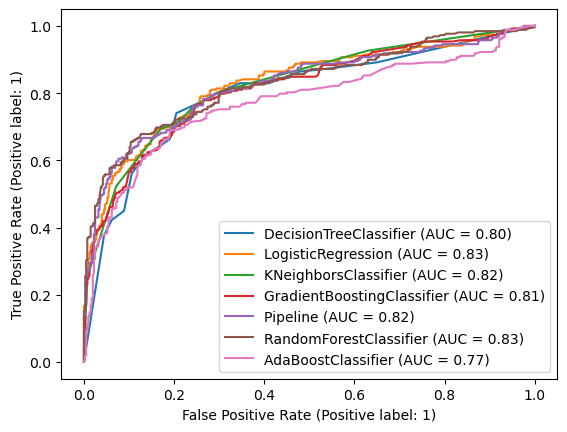

In [120]:
from sklearn.metrics import plot_roc_curve

disp = plot_roc_curve(grid_clf_best, x_train, y_train)

plot_roc_curve(log, x_train, y_train, ax=disp.ax_)
plot_roc_curve(grid_knn_best, x_train, y_train, ax=disp.ax_)
plot_roc_curve(grid_gbdt_best, x_train, y_train, ax=disp.ax_)
plot_roc_curve(svm_best, x_train, y_train, ax=disp.ax_)
plot_roc_curve(grid_rf_best, x_train, y_train, ax=disp.ax_)
plot_roc_curve(ada, x_train, y_train, ax=disp.ax_)

plt.legend(prop = {'size':10}, loc='lower right')
plt.show()

#### According to the above plot, the best AUC of training is LogisticRegression and RandomForest

Let's check it by AUC plot of testing.

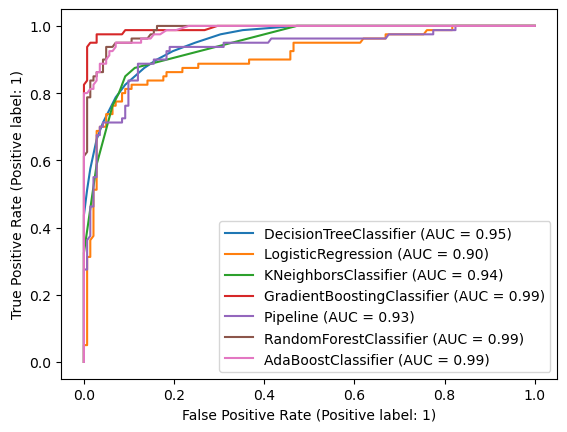

In [121]:
disp = plot_roc_curve(grid_clf_best, x_test, y_test)

plot_roc_curve(log, x_test, y_test, ax=disp.ax_)
plot_roc_curve(grid_knn_best, x_test, y_test, ax=disp.ax_)
plot_roc_curve(grid_gbdt_best, x_test, y_test, ax=disp.ax_)
plot_roc_curve(svm_best, x_test, y_test, ax=disp.ax_)
plot_roc_curve(grid_rf_best, x_test, y_test, ax=disp.ax_)
plot_roc_curve(ada,x_test, y_test, ax=disp.ax_)

plt.legend(prop = {'size':10}, loc='lower right')
plt.show()

#### According to the above plot, the best AUC of testing is RandomForest, Adaboost and gradientboosting

To choose best model , let's check the minimum variation of training and testing AUC score.

#### So here the best model is LogisticRegression()

### Final Model:

In [122]:
x_train,x_test,y_train,y_test = train_test_split(x_scale,y,test_size = 0.25, random_state=5)

log = LogisticRegression()

log.fit(x_train, y_train)

y_pred = log.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print('classification report:\n ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', log.score(x_train, y_train))
print('testing score : ', log.score(x_test, y_test))
print('AUC_ROC_score:', roc_auc_score(y_pred,y_test))

accu score :  0.8828828828828829
classification report:
                precision    recall  f1-score   support

           0       0.88      0.95      0.91       142
           1       0.90      0.76      0.82        80

    accuracy                           0.88       222
   macro avg       0.89      0.86      0.87       222
weighted avg       0.88      0.88      0.88       222

-----------
-----------
Mean absolute error: 0.11711711711711711
Mean square error: 0.11711711711711711
Root mean square error: 0.34222378222022665
R2 Score: 0.4919014084507043
-----------
-----------
training score :  0.7903469079939668
testing score :  0.8828828828828829
AUC_ROC_score: 0.8868411000763942


In [123]:
y_pred =log.predict(x_test)
y_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0], dtype=int64)

### Confusion matrix of final model:

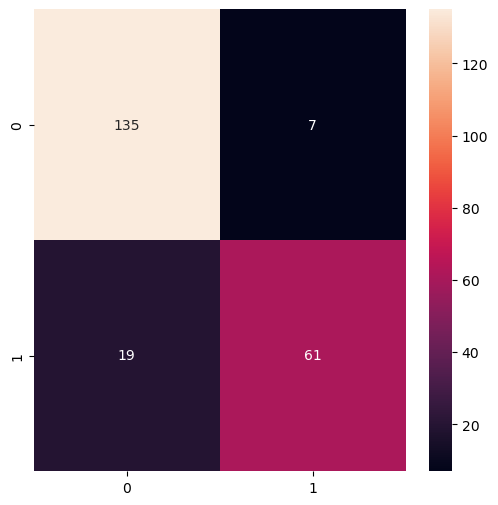

In [124]:
conf = confusion_matrix (y_test, y_pred)

fig , ax = plt.subplots(figsize=(6,6))
sns.heatmap(conf, annot = True, fmt = ".0f")
plt.show()

### Load and save the model

Now , let's save the model for future use.

In [125]:
import pickle
pickle.dump(log, open("Titanic_Classification_model", "wb"))
load_Titanic_Classification_model= pickle.load(open("Titanic_Classification_model", "rb"))

In [126]:
y_pred = load_Titanic_Classification_model.predict(x_test)

y_test = np.array(y_test)
data_prediction_by_model = pd.DataFrame()
data_prediction_by_model["Predicted Values"] = y_pred
data_prediction_by_model["Actual Values"] = y_test
data_prediction_by_model.sample(n=6)

,Predicted Values,Actual Values
199,0,1
54,0,0
69,0,0
70,1,1
129,0,0
107,0,0
